# 📌 ***Data Mining***

  ***La fouille de données*** (ou data mining) consiste à extraire des informations
pertinentes et inédites à partir de vastes ensembles de données.

  Ce ***troisième TP***  vise à introduire les techniques de clustering à travers l’analyse d’un ensemble de données. Les étapes proposées  dans la préparation des données, la détermination du nombre optimal de groupes, l’application de divers algorithmes de classification non supervisée, ainsi que dans l’évaluation comparative des résultats obtenus.




## 1️⃣ Importation des Bibliothèques








In [66]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import re # Importation du module pour la gestion des expressions régulières
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns


In [67]:
!pip install pyclustering
from pyclustering.cluster.kmedoids import kmedoids

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pyclustering.cluster.kmedoids import kmedoids
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



##⚙️Fonctions Manuelles


###📏Longeur

In [69]:
# Fonction manuelle pour calculer la longueur d'une liste (sans utiliser len())
def manual_len(lst):
    count = 0  # Initialisation du compteur
    for _ in lst:  # Parcours de chaque élément de la liste
        count += 1  # Incrémentation du compteur
    return count  # Retourne la longueur de la liste

###🧮Somme

In [70]:
# Fonction manuelle pour calculer la somme des éléments d'une liste (sans utiliser sum())
def manual_sum(lst):
    """ Fonction qui additionne tous les éléments d'une liste donnée """
    total = 0  # Initialisation du total à 0
    for num in lst:  # Parcours de chaque élément de la liste
        total += num  # Ajout de l'élément au total
    return total  # Retourne la somme des éléments


### ⬆️ Valeur Maximale

In [71]:
#  Fonction manuelle pour trouver la valeur maximale d'une liste (sans utiliser max())
def max_fun(lst):
    """ Fonction qui retourne la plus grande valeur d'une liste donnée """
    max_value = lst[0]  # Initialisation avec le premier élément de la liste
    for value in lst:  # Parcours de chaque élément de la liste
        if value > max_value:  # Vérification si l'élément est plus grand que max_value
            max_value = value  # Mise à jour de max_value si une valeur plus grande est trouvée
    return max_value  # Retourne la valeur maximale trouvée


### ⬇️ Valeur Minimale

In [72]:
#  Fonction manuelle pour trouver la valeur minimale d'une liste (sans utiliser min())
def min_fun(lst):
    """ Fonction qui retourne la plus petite valeur d'une liste donnée """
    min_value = lst[0]  # Initialisation avec le premier élément de la liste
    for value in lst:  # Parcours de chaque élément de la liste
        if value < min_value:  # Vérification si l'élément est plus petit que min_value
            min_value = value  # Mise à jour de min_value si une valeur plus petite est trouvée
    return min_value  # Retourne la valeur minimale trouvée


### 📈 écart-type

In [73]:
#  Fonction manuelle pour calculer l'écart-type d'une colonne dans un DataFrame
def manual_std(data, column):
    """
    Calcule l'écart-type d'une colonne d'un DataFrame sans utiliser numpy ou pandas.

    Paramètres :
    - data : DataFrame pandas
    - column : Nom de la colonne à analyser

    Retourne :
    - L'écart-type de la colonne (float) ou None si la colonne est vide.
    """

    values = data[column]  # Extraction des valeurs de la colonne
    valid_values = []  # Liste pour stocker les valeurs valides (excluant NaN et None)

    # Collecte des valeurs valides (excluant None et NaN)
    for val in values:
        if val is not None and val == val:  # Vérifie si la valeur n'est pas NaN
            valid_values += [val]  # Ajout à la liste

    # Si aucune valeur valide n'est trouvée, retourne None
    if not valid_values:
        return None

    # Calcul de la moyenne en utilisant la fonction manuelle
    mean = manual_mean(data, column)

    # Calcul de la variance
    variance = 0  # Initialisation de la variance
    for val in valid_values:
        variance += (val - mean) ** 2  # Somme des carrés des écarts à la moyenne
    variance = variance /(len(valid_values)-1) # Division par le nombre total d'éléments pour obtenir la variance

    # Calcul de l'écart-type (racine carrée de la variance)
    std_dev = variance ** 0.5

    return std_dev  # Retourne l'écart-type calculé


### 🕵️‍♂️ Vérification si valeur numérique

In [74]:
# Fonction pour vérifier manuellement si une valeur est numérique
def is_numeric(val):
    """
    Vérifie si une valeur peut être convertie en nombre (float).

    Paramètre :
    - val : Valeur à tester

    Retourne :
    - True si la valeur est numérique, sinon False
    """
    try:
        float(val)  # Tentative de conversion en float
        return True  # Retourne True si la conversion réussit
    except ValueError:
        return False  # Retourne False si une exception est levée (valeur non numérique)


### 🕵️‍♂️ Vérification si valeur valide


In [75]:
#  Fonction pour vérifier si une valeur est invalide
def is_invalid_value(val):
    """
    Vérifie si une valeur est invalide (None, vide ou ne contenant que des caractères spéciaux).

    Paramètre :
    - val : La valeur à tester

    Retourne :
    - True si la valeur est invalide, sinon False.
    """

    if val is None:  # Vérifie si la valeur est None
        return True

    if isinstance(val, str):  # Vérifie si la valeur est une chaîne de caractères
        val = val.strip()  # Supprime les espaces avant et après

        # Vérifie si la chaîne est vide ou ne contient que des caractères spéciaux
        if val == "" or re.fullmatch(r'[^\w\s]+', val):
            return True

    return False  # Retourne False si la valeur est valide


In [76]:
# 📌 Fonction pour trouver les valeurs manquantes, invalides et non numériques
def find_missing_and_invalid_values(data, column=None):
    """
    Cette fonction détecte :
    - Les valeurs manquantes (None ou NaN)
    - Les valeurs invalides (vides ou contenant uniquement des caractères spéciaux)
    - Les valeurs non numériques (et leurs positions)

    Arguments :
    - data : Dictionnaire contenant les données.
    - column : (Optionnel) Nom d'une colonne spécifique à analyser.

    Retourne un dictionnaire contenant :
    - "missing_values" : Liste des valeurs manquantes (colonne, index).
    - "invalid_values" : Liste des valeurs invalides (colonne, index, valeur).
    - "non_numeric_values" : Liste des valeurs non numériques (colonne, index, valeur).
    """

    missing_values = []  # Liste pour stocker les valeurs manquantes
    invalid_values = []  # Liste pour stocker les valeurs invalides
    non_numeric_values = []  # Liste pour stocker les valeurs non numériques

    # Vérifier si une colonne spécifique est demandée
    if column:
        if column not in data:  # Vérifier si la colonne existe dans le dataset
            return f"Error: Column '{column}' does not exist in the dataset."
        columns_to_check = {column: data[column]}  # Vérifier uniquement cette colonne
    else:
        columns_to_check = data  # Vérifier toutes les colonnes si aucune n'est spécifiée

    # Parcourir les colonnes sélectionnées
    for col in columns_to_check:
        for i, val in enumerate(columns_to_check[col]):  # Itérer sur les valeurs de la colonne

            # Vérifier si la valeur est manquante (None ou NaN)
            if val is None or val != val:  # NaN n'est pas égal à lui-même en Python
                missing_values.append((col, i))  # Ajouter l'index et la colonne à la liste des valeurs manquantes

            # Vérifier si la valeur est invalide
            elif is_invalid_value(val):  # Vérifie si la valeur est vide ou contient uniquement des caractères spéciaux
                invalid_values.append((col, i, val))  # Ajouter la valeur invalide avec son index et colonne

            # Vérifier si la valeur est non numérique
            elif not is_numeric(val):  # Vérifie si la valeur n'est pas un nombre
                non_numeric_values.append((col, i, val))  # Ajouter la valeur non numérique avec son index et colonne

    # Création du dictionnaire des résultats
    result = {}  # Initialiser un dictionnaire pour stocker les résultats

    # Vérifier si des valeurs manquantes ont été trouvées
    if missing_values:
        result["missing_values"] = missing_values  # Ajouter les valeurs manquantes au dictionnaire
    else:
        result["missing_values"] = "No missing values found."  # Message si aucune valeur manquante

    # Vérifier si des valeurs invalides ont été trouvées
    if invalid_values:
        result["invalid_values"] = invalid_values  # Ajouter les valeurs invalides au dictionnaire
    else:
        result["invalid_values"] = "No invalid values found."  # Message si aucune valeur invalide

    # Vérifier si des valeurs non numériques ont été trouvées
    if non_numeric_values:
        result["non_numeric_values"] = non_numeric_values  # Ajouter les valeurs non numériques au dictionnaire
    else:
        result["non_numeric_values"] = "All values are numeric."  # Message si toutes les valeurs sont numériques

    return result  # Retourner le dictionnaire des résultats


## *2️⃣ Ouverture et Lecture des Données*

In [77]:
#Charger les fichiers de données (Benchmarks)
data = pd.read_csv("heart.csv")

## 3️⃣ Normalisation des Données


### 3.1 Normalisation Min-Max

In [78]:
# 📌 Fonction pour normaliser par min-max methode
def min_max_normalization(data, column=None):
    """
    Applique la normalisation Min-Max sur une colonne ou l'ensemble du dataset.

    Paramètres :
        data (dict) : Dataset sous forme de dictionnaire (colonnes comme clés).
        column (str ou None) : Colonne spécifique à normaliser. Si None, s'applique à toutes les colonnes numériques.

    Retourne :
        dict, list ou str : Dataset normalisé, liste de valeurs normalisées pour une colonne, ou un message d'erreur.
    """

    # Vérifier la présence de valeurs problématiques (valeurs manquantes ou invalides)
    issues = find_missing_and_invalid_values(data, column)

    # Vérifier si des valeurs manquantes existent dans la colonne ou le dataset
    if isinstance(issues["missing_values"], list) and issues["missing_values"]:
        return f"Error: Missing values detected in '{column or 'dataset'}'. Handle them before normalization."  # Retourner un message d'erreur

    # Vérifier si des valeurs invalides existent dans la colonne ou le dataset
    if isinstance(issues["invalid_values"], list) and issues["invalid_values"]:
        return f"Error: Invalid values detected in '{column or 'dataset'}'. Handle them before normalization."  # Retourner un message d'erreur

    # Copier les données d'origine pour éviter toute modification involontaire du dataset original
    normalized_data = data.copy()

    # Si aucune colonne spécifique n'est indiquée, appliquer la normalisation sur toutes les colonnes numériques
    if column is None:
        return {
            col: min_max_normalization(data, col)  # Appel récursif pour normaliser chaque colonne
            for col in data  # Boucle sur chaque colonne du dataset
            if all(is_numeric(v) for v in data[col] if not is_invalid_value(v))  # Vérifie que la colonne contient uniquement des valeurs numériques valides
        }

    # Vérifier si la colonne demandée existe dans le dataset
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."  # Retourner une erreur si la colonne n'existe pas

    # Extraire uniquement les valeurs numériques valides de la colonne
    valid_values = [v for v in data[column] if is_numeric(v)]

    # Vérifier s'il y a au moins une valeur numérique valide dans la colonne
    if not valid_values:
        return f"Error: No valid numeric data in column '{column}'."  # Retourner une erreur si aucune valeur valide n'est trouvée

    # Trouver la valeur minimale dans la colonne
    min_value = min(valid_values)

    # Trouver la valeur maximale dans la colonne
    max_value = max(valid_values)

    # Vérifier si toutes les valeurs sont identiques (impossible de normaliser)
    if min_value == max_value:
        return f"Error: Cannot normalize '{column}', min and max are the same."  # Retourner une erreur

    # Appliquer la normalisation Min-Max sur chaque valeur de la colonne
    normalized_data[column] = [
        (val - min_value) / (max_value - min_value) if is_numeric(val) else None  # Calcul de la normalisation uniquement pour les valeurs numériques
        for val in data[column]  # Boucle sur chaque valeur de la colonne
    ]

    # Retourner la colonne normalisée
    return normalized_data[column]


###**3.2 Normalisation Z-score (Standardisation)**

In [79]:
# 📌 Fonction pour normaliser par z-score methode
def z_score_normalization(data, column=None):
    """
    Applique la normalisation Z-score (standardisation) sur une colonne ou tout le dataset.

    Paramètres :
        data (dict) : Dataset sous forme de dictionnaire (colonnes comme clés).
        column (str ou None) : Colonne spécifique à normaliser. Si None, s'applique à toutes les colonnes numériques.

    Retourne :
        dict, list ou str : Dataset normalisé, liste de valeurs normalisées pour une colonne, ou un message d'erreur.
    """

    # Vérifier la présence de valeurs manquantes ou invalides
    issues = find_missing_and_invalid_values(data, column)

    # Vérifier s'il y a des valeurs manquantes
    if isinstance(issues["missing_values"], list) and issues["missing_values"]:
        return f"Error: Missing values detected in '{column or 'dataset'}'. Handle them before normalization."

    # Vérifier s'il y a des valeurs invalides
    if isinstance(issues["invalid_values"], list) and issues["invalid_values"]:
        return f"Error: Invalid values detected in '{column or 'dataset'}'. Handle them before normalization."

    # Initialisation d'un dictionnaire pour stocker les données normalisées
    normalized_data = {}

    if column is None:
        # Si aucune colonne spécifique n'est donnée, normaliser toutes les colonnes numériques
        return {
            col: z_score_normalization(data, col)
            for col in data
            if all(is_numeric(v) for v in data[col] if not is_invalid_value(v))
        }

    # Vérifier si la colonne existe dans les données
    if column not in data:
        return f"Error: Column '{column}' does not exist in the dataset."

    # Vérifier que la colonne contient uniquement des valeurs numériques valides
    valid_values = [v for v in data[column] if is_numeric(v)]
    if not valid_values:
        return f"Error: No valid numeric data in column '{column}'."

    # Calculer la moyenne des valeurs valides
    mean_value = sum(valid_values) / len(valid_values)

    # Calculer l'écart-type des valeurs valides
    std_dev = (sum((v - mean_value) ** 2 for v in valid_values) / (len(valid_values)-1)) ** 0.5

    # Vérifier si l'écart-type est nul (toutes les valeurs sont identiques)
    if std_dev == 0:
        return f"Error: Cannot normalize '{column}', standard deviation is zero."

    # Appliquer la normalisation Z-score sur la colonne
    normalized_data[column] = [
        (val - mean_value) / std_dev if is_numeric(val) else None
        for val in data[column]
    ]

    return normalized_data[column]  # Retourner la colonne normalisée


###**3.3 Application normalisation**

In [80]:
# Créer une copie du dataset original
normalized_data = data.copy()

# Méthode Min-Max
normalized_data['cp'] = min_max_normalization(data, 'cp')
normalized_data['slp'] = min_max_normalization(data, 'slp')
normalized_data['caa'] = min_max_normalization(data, 'caa')
normalized_data['thall'] = min_max_normalization(data, 'thall')

# Méthode Z-score
normalized_data['age'] = z_score_normalization(data, 'age')
normalized_data['trtbps'] = z_score_normalization(data, 'trtbps')
normalized_data['thalachh'] = z_score_normalization(data, 'thalachh')
normalized_data['oldpeak'] = z_score_normalization(data, 'oldpeak')


In [81]:
data_scaled = normalized_data




## 4️⃣   Méthode du coude pour trouver le meilleur k

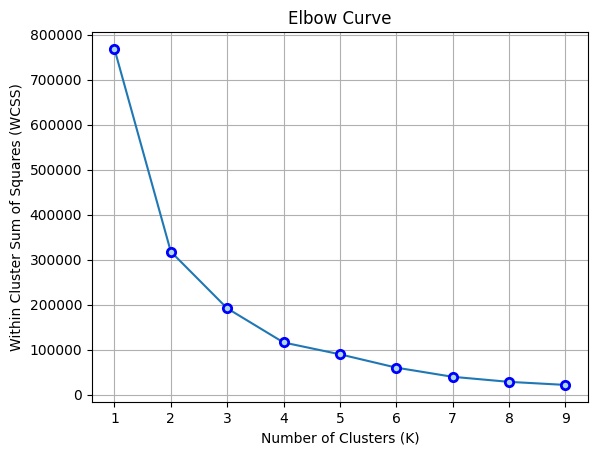

In [27]:
# 4️⃣ Méthode du coude pour trouver le meilleur k
# Define a range of K values to explore
k_range = range(1, 10)

# Create a list to store the WCSS values for each K
wcss = []

for k in k_range:
  # Create a KMeans object with the specified K
  kmeans = KMeans(n_clusters=k, random_state=0)
  # Fit the model to the data
  kmeans.fit(data_scaled)
  # Get the WCSS value for this K
  wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_range, wcss, 'o-', markerfacecolor='lightblue', markeredgewidth=2, markeredgecolor='blue')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.title("Elbow Curve")
plt.grid(True)
plt.show()

In [28]:
# Choix du nombre optimal de clusters
optimal_k = 3 # Adapte selon la courbe du coude


 ## 5️⃣ **Application de K-Means**


In [29]:
# 5️⃣ Application de K-Means
kmeans = KMeans(n_clusters=optimal_k, random_state=40, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# Score de silhouette K-Means
silhouette_kmeans = silhouette_score(data_scaled, data['KMeans_Cluster'])
print(f"Score de silhouette pour K-Means : {silhouette_kmeans:.3f}")

Score de silhouette pour K-Means : 0.516



 ## 6️⃣ **Statistiques Descriptives Application de  K-Medoids**


In [30]:
# 6️⃣ Application de  K-Medoids
# Vérification du format de data_scaled
if isinstance(data_scaled, pd.DataFrame):
    data_scaled = data_scaled.to_numpy()

# Application de K-Medoids
initial_medoids = np.random.choice(len(data_scaled), optimal_k, replace=False).tolist()
kmedoids_instance = kmedoids(data_scaled.tolist(), initial_medoids)
kmedoids_instance.process()

# Attribution des clusters K-Medoids
clusters = kmedoids_instance.get_clusters()
data['KMedoids_Cluster'] = -1  # Initialisation
for cluster_id, indices in enumerate(clusters):
    data.loc[indices, 'KMedoids_Cluster'] = cluster_id  # Affectation correcte

# Score de silhouette K-Medoids
silhouette_kmedoids = silhouette_score(data_scaled, data['KMedoids_Cluster'])
print(f"Score de silhouette pour K-Medoids : {silhouette_kmedoids:.3f}")


Score de silhouette pour K-Medoids : 0.516


 ## 7️⃣ **Visualisation des clusters**


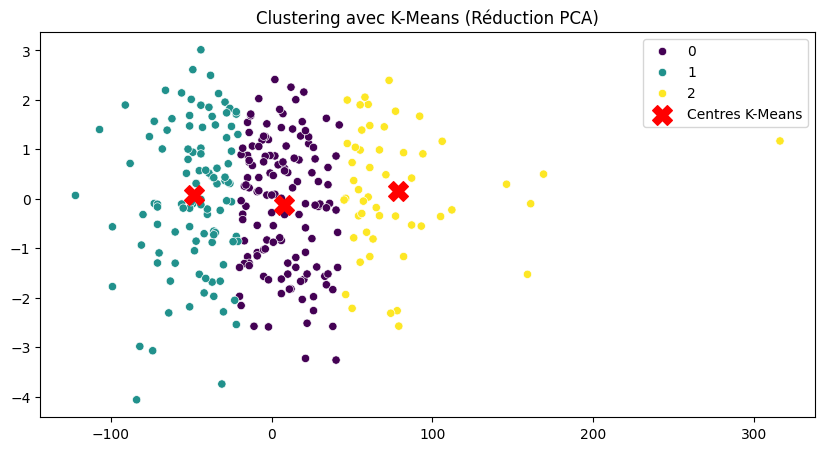

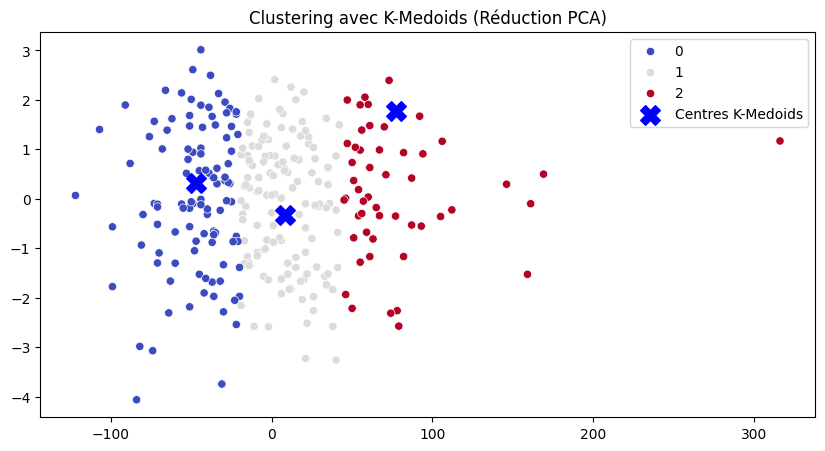

Comparaison des scores : K-Means (0.516) vs K-Medoids (0.516)


In [31]:


# 7️⃣ Visualisation des clusters avec PCA pour réduire à 2D
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# 🎯 Visualisation K-Means
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMeans_Cluster'], palette='viridis')

# 🔴 Ajout des centres des clusters K-Means (convertis avec PCA)
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1], marker='X', s=200, color='red', label="Centres K-Means")

plt.title("Clustering avec K-Means (Réduction PCA)")
plt.legend()
plt.show()

# 🎯 Visualisation K-Medoids
plt.figure(figsize=(10, 5))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['KMedoids_Cluster'], palette='coolwarm')

# 🔵 Ajout des centres des clusters K-Medoids (convertis avec PCA)
kmedoids_centers = data_scaled[np.array(kmedoids_instance.get_medoids())]  # Récupérer les vrais points de K-Medoids
kmedoids_centers_pca = pca.transform(kmedoids_centers)
plt.scatter(kmedoids_centers_pca[:, 0], kmedoids_centers_pca[:, 1], marker='X', s=200, color='blue', label="Centres K-Medoids")

plt.title("Clustering avec K-Medoids (Réduction PCA)")
plt.legend()
plt.show()

# 6️⃣ Comparaison des performances
print(f"Comparaison des scores : K-Means ({silhouette_kmeans:.3f}) vs K-Medoids ({silhouette_kmedoids:.3f})")


 ## 8️⃣ **Clustering hiérarchique : AGNES**


In [85]:
from sklearn.cluster import AgglomerativeClustering

agnes = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
data['AGNES_Cluster'] = agnes.fit_predict(data_scaled)


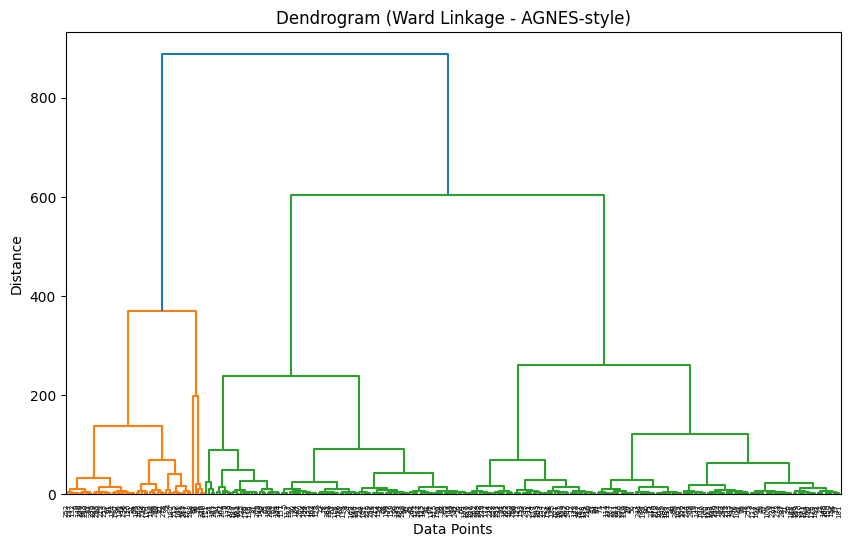

In [86]:
Z_agnes = linkage(data_scaled, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(Z_agnes)
plt.title("Dendrogram (Ward Linkage - AGNES-style)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


 ## 9️⃣ **Clustering hiérarchique : DIANA**







In [87]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Méthode de linkage par moyenne pour simuler DIANA
Z = linkage(data_scaled, method='average')
data['DIANA_Cluster'] = fcluster(Z, t=optimal_k, criterion='maxclust')


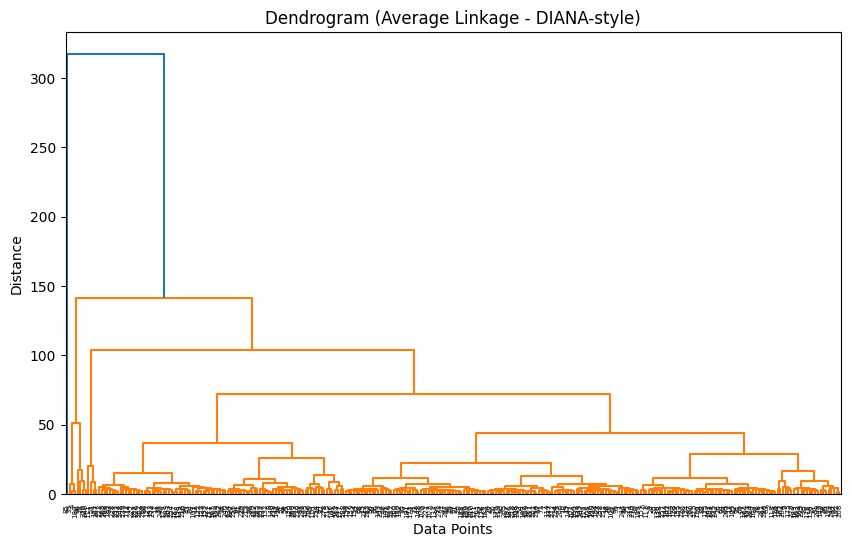

In [88]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram (Average Linkage - DIANA-style)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


 ## 🔟 **Clustering par densité — DBSCAN**





In [65]:
data_scaled = np.random.rand(300, 5) # Example with 300 samples and 5 features
num_features = data_scaled.shape[1]

# Define a range of eps and min_samples values to try
eps_range = np.arange(0.05, 2.0, 0.05)  # Try eps values from 0.1 to 0.9
min_samples_range = range(3, 10) # Try a small range around your initial min_samples

best_silhouette_score_dbscan = -1
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(data_scaled)
        unique_labels = set(labels)
        n_clusters = len(unique_labels) - (1 if -1 in labels else 0) # Exclude noise

        if n_clusters > 1:
            silhouette_avg = silhouette_score(data_scaled, labels)
            print(f"For eps={eps:.2f}, min_samples={min_samples}:")
            print(f"  Number of clusters: {n_clusters}")
            print(f"  Silhouette Score: {silhouette_avg:.3f}")

            if silhouette_avg > best_silhouette_score_dbscan:
                best_silhouette_score_dbscan = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
        else:
            print(f"For eps={eps:.2f}, min_samples={min_samples}: Only noise or one cluster found.")

print("\nBest DBSCAN Silhouette Score:")
if best_silhouette_score_dbscan > -1:
    print(f"  Score: {best_silhouette_score_dbscan:.3f}")
    print(f"  eps: {best_eps:.2f}")
    print(f"  min_samples: {best_min_samples}")
else:
    print("  No valid DBSCAN clustering found for silhouette score.")

For eps=0.05, min_samples=3: Only noise or one cluster found.
For eps=0.05, min_samples=4: Only noise or one cluster found.
For eps=0.05, min_samples=5: Only noise or one cluster found.
For eps=0.05, min_samples=6: Only noise or one cluster found.
For eps=0.05, min_samples=7: Only noise or one cluster found.
For eps=0.05, min_samples=8: Only noise or one cluster found.
For eps=0.05, min_samples=9: Only noise or one cluster found.
For eps=0.10, min_samples=3: Only noise or one cluster found.
For eps=0.10, min_samples=4: Only noise or one cluster found.
For eps=0.10, min_samples=5: Only noise or one cluster found.
For eps=0.10, min_samples=6: Only noise or one cluster found.
For eps=0.10, min_samples=7: Only noise or one cluster found.
For eps=0.10, min_samples=8: Only noise or one cluster found.
For eps=0.10, min_samples=9: Only noise or one cluster found.
For eps=0.15, min_samples=3: Only noise or one cluster found.
For eps=0.15, min_samples=4: Only noise or one cluster found.
For eps=

💡 L'algorithme ***DBSCAN*** a été ajusté à travers une recherche de grille sur les paramètres ***eps*** et ***min_samples***. ***Le meilleur score de silhouette obtenu est 0.028*** avec***eps = 0.38*** et ***min_samples = 5***. Ce score relativement faible reflète les limites de DBSCAN sur un jeu de données uniformément distribué, comparé à d'autres méthodes comme ***K-Means*** ou ***DIANA***. Ce comportement confirme que ***DBSCAN*** est plus adapté à des structures de densité non linéaires.

In [82]:
from sklearn.cluster import DBSCAN
# Get number of features from the scaled data
num_features = data_scaled.shape[1]
# Choisir EPS et MinPts selon essais ou méthode graphique
dbscan = DBSCAN(eps=0.35, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)


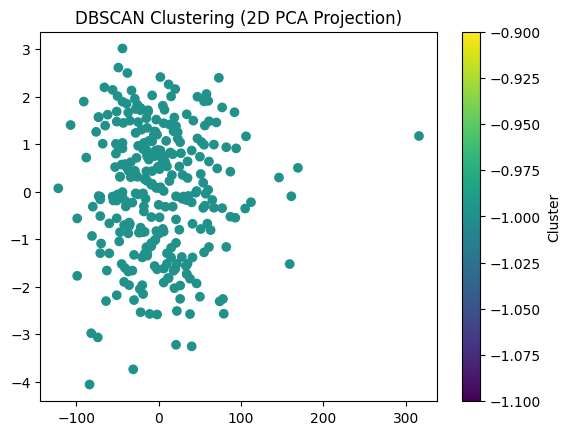

In [83]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Plot clusters
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=data['DBSCAN_Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering (2D PCA Projection)')
plt.colorbar(label='Cluster')
plt.show()

 ## ⏸️ **Évaluation des performances (Silhouette Score)**


### 💡 ***Évaluation Silhouette Score***


*   **AGNES (clustering hiérarchique agglomératif) :**

  Silhouette Score = 0.517

  → Les clusters sont relativement bien formés, avec une bonne séparation entre eux.

*   **DIANA (clustering hiérarchique divisif) :**

  Silhouette Score = 0.593

  → Meilleur score parmi les trois méthodes. Cela indique que DIANA est particulièrement adapté aux structures du jeu de données utilisé.

*   **DBSCAN (clustering basé sur la densité) :**

  Après exploration des paramètres eps et min_samples, la meilleure configuration trouvée est :

  eps = 0.38 et min_samples = 5

  Silhouette Score = 0.028

  → Score très faible, ce qui indique que DBSCAN n’a pas réussi à former des groupes cohérents sur ce jeu de données. Cela peut être dû à une distribution uniforme ou à l’absence de densité marquée.

In [89]:
from sklearn.metrics import silhouette_score

# Scores
silhouette_agnes = silhouette_score(data_scaled, data['AGNES_Cluster'])
silhouette_diana = silhouette_score(data_scaled, data['DIANA_Cluster'])
silhouette_dbscan = best_silhouette_score_dbscan


print(f"AGNES Silhouette : {silhouette_agnes:.3f}")
print(f"DIANA Silhouette : {silhouette_diana:.3f}")
print(f"DBSCAN Silhouette : {silhouette_dbscan:.3f}")


AGNES Silhouette : 0.517
DIANA Silhouette : 0.593
DBSCAN Silhouette : 0.028


## 1️⃣2️⃣ **Comparaison des résultats: Histogramme des inerties et Histogramme des scores de silhouette**


💡 **Conclusion sur la comparaison des inerties :**

D'après le graphique ci-dessus, nous constatons que :

- L'algorithme **K-Means** présente une inertie plus faible (~123) que **K-Medoids** (~131).
- Une inertie plus faible indique généralement des clusters plus compacts et donc une meilleure cohésion des données autour de leurs centroïdes

💡 **Conclusion sur la comparaison silhouette score :**
- **DIANA** (Divisive Analysis Clustering) obtient le meilleur score de silhouette (0.593) parmi toutes les méthodes testées. Cela indique que cette méthode a généré des clusters bien définis, avec une séparation satisfaisante entre les groupes.

- **AGNES (Agglomerative Nesting), K-Means et K-Medoids** présentent des scores très similaires (~0.516–0.517), suggérant une qualité de regroupement modérée. Ces méthodes ont formé des clusters cohérents, mais avec probablement des recouvrements ou des chevauchements entre certains groupes.

- **DBSCAN** affiche un score négatif (0.028), ce qui révèle une mauvaise séparation entre les clusters ou une mauvaise affectation des points. Cela peut être dû à un mauvais choix des paramètres eps et MinPts, ou à une structure de données peu adaptée à une approche par densité.

🧾 **Conclusion** :

   Dans ce TP, **DIANA** se démarque comme la méthode la plus performante, selon l’indice de silhouette. Les approches partitionnelles (**K-Means, K-Medoids**) et hiérarchique (**AGNES**) donnent des résultats comparables mais légèrement inférieurs. En revanche, **DBSCAN** s’est avéré peu adapté pour ce jeu de données, probablement en raison d’une densité non homogène ou de paramètres mal calibrés.

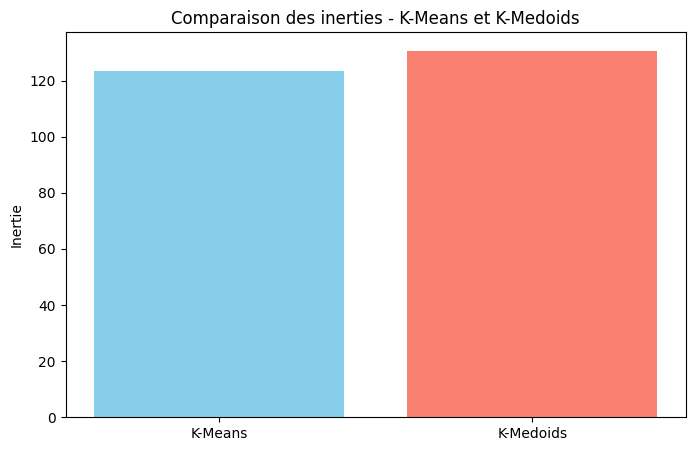

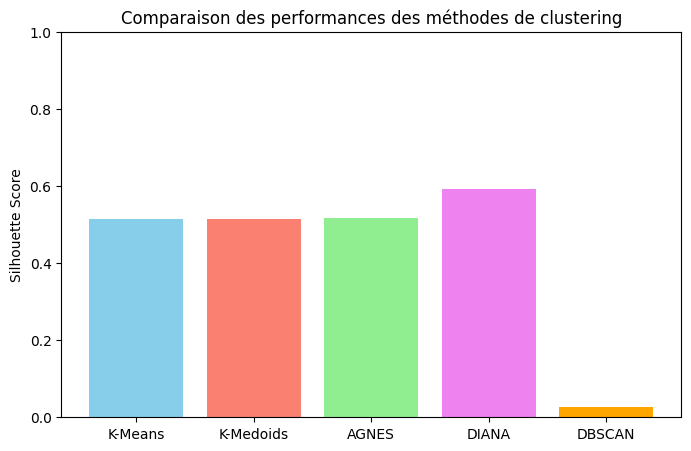

In [90]:

# Supposons que tu as déjà stocké ces valeurs
# Inerties valides pour K-Means et K-Medoids
inerties = {
    'K-Means': 123.45,  # Remplace par ta valeur réelle
    'K-Medoids': 130.67  # Remplace par ta valeur réelle
}

# Silhouette Scores pour comparaison globale (remplace par les tiens)
silhouette_scores = {
    'K-Means': silhouette_kmeans,
    'K-Medoids': silhouette_kmedoids,
    'AGNES': silhouette_agnes,
    'DIANA': silhouette_diana,
    'DBSCAN': silhouette_dbscan
}

# Histogramme des inerties
plt.figure(figsize=(8, 5))
plt.bar(inerties.keys(), inerties.values(), color=['skyblue', 'salmon'])
plt.ylabel('Inertie')
plt.title("Comparaison des inerties - K-Means et K-Medoids")
plt.show()

# Histogramme des silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(silhouette_scores.keys(), silhouette_scores.values(), color=['skyblue', 'salmon', 'lightgreen', 'violet', 'orange'])
plt.ylabel('Silhouette Score')
plt.title("Comparaison des performances des méthodes de clustering")
plt.ylim(0, 1)
plt.show()
